In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# returns a dataframe with the frequency of digits 0-9 from given list of nums
def get_frequencies(nums):
    freqs_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    for num in nums:
        if not pd.isna(num):
            freqs_list[num] += 1
    freqs_df = pd.DataFrame(freqs_list, index=range(0, 10), columns=['freq'])

    return freqs_df

#returns the first digit after the decimal point
def first_after_decimal(num):
    if pd.isna(num):
        return
    if num == 0:
        return
    else:
        num = float(num) * 10000000
        return(first_digit(abs(num)))
#     return(first_digit(abs(num)))
#     return int((abs(float(num)) * 10) % 10)

In [13]:
def first_digit(num):
    if pd.isna(num):
        return
    v = str(num)[0]
    if v == '.':
        return
#     print(int(str(num)))
    return int(str(num)[0])

In [14]:
all_files = ["Data/11.csv"] # "Data/5.csv","Data/28.csv","Data/35.csv","Data/53.csv",

#  "Data/71.csv", "Data/1.csv", "Data/14.csv", "Data/19_SHORT.csv", "Data/22.csv",
#             "Data/25.csv", "Data/32_LETTER.csv", "Data/34.csv", "Data/36.csv",
#             "Data/42.csv", "Data/43.csv", "Data/47.csv", "Data/48.csv", "Data/49.csv", "Data/50.csv",
#             "Data/51.csv", "Data/54.csv", "Data/56.csv", "Data/59.csv",
#             "Data/63.csv", "Data/67.csv", "Data/68.csv",
#             "Data/70.csv", "Data/72.csv", "Data/76.csv", "Data/79.csv",
#             "Data/80.csv", "Data/82.csv", "Data/91.csv"

In [15]:
df2 = pd.DataFrame(index=range(0, 10))

i = 1
std_devs = {}

for file in all_files:
    print(i)
    i += 1
    data = pd.read_csv(file, na_values=['-', 'ND'], header=[0])
    last_digits = [] #
    last_digit_dict = {}
    last_digit_freq = {}

    for column in data:
        nums = data[column]
        last_digit = [first_after_decimal(num) for num in nums]
        #last_digit = [first_digit(num) for num in nums]
        last_digits += last_digit
        last_digit_dict[column] = last_digit
        

    df1 = get_frequencies(last_digits)
    
    column_data = {}
    keys = []

    for key in last_digit_dict.keys():
        frequencies = get_frequencies(last_digit_dict[key])
        frequencies['Percentage'] = frequencies['freq'] / sum(frequencies['freq']) * 100
        last_digit_freq[key] = frequencies

        message = (f"{key}"
        f"{frequencies}"
        f"")
        #print(message)
        
        column_data[key] = frequencies['Percentage']
        keys.append(key)
 
    
    df5 = pd.DataFrame(column_data)
    #df5['Average'] = df1['freq'] / sum(df1['freq']) * 100
    print(df5)
    df5 = df5.drop([0])
    
    std_devs[file] = df5.std(axis = 1)
    
# print(std_devs)
# df7 = pd.DataFrame(std_devs)
# print(df7)
        
    df1['Percentage'] = df1['freq'] / sum(df1['freq']) * 100
    df2[file] = df1['freq'] / sum(df1['freq']) * 100
    print(df2)


#         df1.columns = ['Element', 'Frequency']
#     df1['Percentage'] = df1['Frequency'] / sum(df1['Frequency']) * 100
#     if first:
#         df2 = df1[['Element', 'Percentage']].copy()
#         df2.rename(columns={'Percentage': file}, inplace=True)
#         first = False
#     else:
#         df2[file] = df1['Frequency'] / sum(df1['Frequency']) * 100

1
        LL.4       LL.8      LL.12      LL.16      LL.20      LL.24  \
0   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
1  31.728045  23.418319  27.573182  33.522191  34.183192  35.977337   
2  21.435316  19.169027  21.624174  17.280453  20.113314  18.413598   
3  13.975449  19.357885  14.164306  10.859301  12.653447  10.670444   
4   8.970727  12.086874   9.537299   9.159585   7.459868   7.459868   
5   5.854580   8.498584   6.610009   6.610009   6.232295   6.610009   
6   5.099150   5.949008   6.610009   7.271010   5.949008   5.665722   
7   4.060434   4.154863   5.571294   5.571294   4.343720   3.966006   
8   3.966006   4.154863   4.249292   5.099150   4.532578   5.665722   
9   4.910293   3.210576   4.060434   4.627007   4.532578   5.571294   

       LL.28      LL.32      LL.36      LL.40      LL.44      LL.48  
0   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000  
1  34.560907  22.474032  28.895184  38.432483  33.238905  29.839471  
2  17.

    level_0  Digit  percentage
0      LL.4      1   31.728045
1      LL.4      2   21.435316
2      LL.4      3   13.975449
3      LL.4      4    8.970727
4      LL.4      5    5.854580
..      ...    ...         ...
103   LL.48      5    5.476865
104   LL.48      6    4.815864
105   LL.48      7    2.644004
106   LL.48      8    4.721435
107   LL.48      9    4.343720

[108 rows x 3 columns]


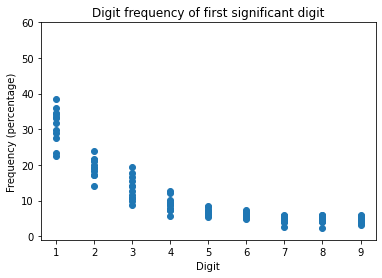

In [16]:
df6 = pd.DataFrame(df5).T.stack().reset_index()#.drop(columns=['level_1'])
df6 = df6.rename(columns={0: "percentage", "level_1": "Digit"})
print(df6)

plt.scatter(x = 'Digit', y = 'percentage', data = df6)
# plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.ylim(-1, 60)
plt.ylabel("Frequency (percentage)")
plt.xlabel("Digit")
plt.title("Digit frequency of first significant digit")
plt.savefig('Data/fig1a', dpi=300)
plt.show()

In [17]:
df6 = df6.astype({'Digit': str})

df6 = pd.pivot_table(df6, values = 'percentage', index = 'level_0', columns = 'Digit').reset_index()
print(df6)

Digit level_0          1          2          3          4         5         6  \
0       LL.12  27.573182  21.624174  14.164306   9.537299  6.610009  6.610009   
1       LL.16  33.522191  17.280453  10.859301   9.159585  6.610009  7.271010   
2       LL.20  34.183192  20.113314  12.653447   7.459868  6.232295  5.949008   
3       LL.24  35.977337  18.413598  10.670444   7.459868  6.610009  5.665722   
4       LL.28  34.560907  17.091596  10.009443   8.687441  6.704438  6.421152   
5       LL.32  22.474032  21.152030  17.847025  12.747875  8.309726  6.610009   
6       LL.36  28.895184  19.263456  15.486308  10.103872  7.176582  5.288008   
7        LL.4  31.728045  21.435316  13.975449   8.970727  5.854580  5.099150   
8       LL.40  38.432483  14.069877   8.876298   7.365439  7.365439  6.421152   
9       LL.44  33.238905  21.435316  11.520302   5.571294  6.987724  6.232295   
10      LL.48  29.839471  23.796034  16.525024   7.837583  5.476865  4.815864   
11       LL.8  23.418319  19

In [18]:
# plt.boxplot(df7, sym="k.", medianprops=dict(color="black"))
# plt.xticks([0,1,2,3,4,5,6,7,8,9])
# plt.ylim(-1, 40)
# plt.ylabel("Standard Deviation")
# plt.xlabel("Digit")
# plt.title("Standard deviation of digit frequency of first significant digit")
# plt.savefig('Data/fig1a', dpi=300)
# plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
print(features)

# Separating out the features
x = df6.loc[:, features].values
# # Separating out the target
y = df6.loc[:,['level_0']].values
# # # Standardizing the features

x = StandardScaler().fit_transform(x)
print(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df6[['level_0']]], axis = 1)
print(finalDf)

['1', '2', '3', '4', '5', '6', '7', '8', '9']
[[-0.76604646  0.82118116  0.21138066  0.31874798 -0.30520252  0.85266132
   1.00371403 -0.40734876 -0.74614367]
 [ 0.5067692  -0.91556979 -0.8330885   0.12507832 -0.30520252  1.82054715
   1.00371403  0.45527215 -0.02016605]
 [ 0.64819316  0.21709387 -0.26609095 -0.74643514 -0.74913345 -0.1152245
  -0.36978938 -0.11980846 -0.14116232]
 [ 1.0320582  -0.46250433 -0.89277245 -0.74643514 -0.30520252 -0.53003271
  -0.79240582  1.03035275  1.18979667]
 [ 0.72900685 -0.99108071 -1.10166629 -0.11700875 -0.19421978  0.57612252
   0.5810976   1.41373982  0.82680785]
 [-1.85703131  0.63240388  1.37521773  1.96494007  1.69248668  0.85266132
   0.15848116 -2.42013088 -1.10913248]
 [-0.48319854 -0.12270523  0.62916833  0.60925246  0.36069388 -1.08311033
  -0.36978938 -0.50319553  0.82680785]
 [ 0.12290416  0.74567024  0.15169671  0.02824349 -1.19306438 -1.35964914
  -0.68675171 -0.69488907  0.34282277]
 [ 1.5573472  -2.19925528 -1.45977    -0.79485255  

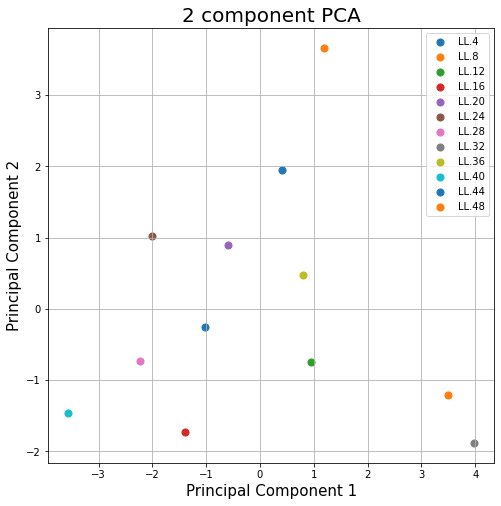

In [21]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = keys
for target in targets:
    indicesToKeep = finalDf['level_0'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , s = 50)
ax.legend(targets)
ax.grid()